**RQ4: How do self-rated poverty trends compare between Metro Manila, Visayas, Mindanao, and Luzon (Outside of NCR)?**

**Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

**Plot and Design Setting**

In [2]:
# Color settings
colors = ["#648FFF", "#785EF0", "#A11C5D", "#FE6100", "#FFB000", "#000000", "#FFFFFF"]
colors_grad = sns.color_palette('flare_r', 12)
colors_heat1 = sns.color_palette('flare_r', as_cmap=True)
colors_heat2 = sns.diverging_palette(315, 261, s=74, l=50, center='dark', as_cmap=True)
color_bg = "#1B181C"
color_text = "#FFFFFF"

# Plot settings
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams["figure.figsize"] = (20, 8)
mpl.rcParams['font.family'] = 'Roboto'
mpl.rcParams['figure.titlesize'] = 32
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['axes.titlepad'] = 72
mpl.rcParams['axes.labelpad'] = 10
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.pad'] = 10
mpl.rcParams['xtick.major.width'] = 0
mpl.rcParams['xtick.minor.width'] = 0
mpl.rcParams['ytick.major.width'] = 0
mpl.rcParams['ytick.minor.width'] = 0
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False
mpl.rcParams['legend.title_fontsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['legend.frameon'] = False
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'
mpl.rcParams["figure.facecolor"] = color_bg
mpl.rcParams["axes.facecolor"] = color_bg
mpl.rcParams["savefig.facecolor"] = color_bg
mpl.rcParams['text.color'] = color_text
mpl.rcParams['axes.labelcolor'] = color_text
mpl.rcParams['xtick.color'] = color_text
mpl.rcParams['ytick.color'] = color_text
mpl.rcParams['axes.edgecolor'] = color_text

**Data Preprocessing and Extraction**

In [3]:
# Load Dataset and Data Cleaning for areas
area_data = pd.read_csv("CS132_DataSheet-by-area.csv")

# Ensure 'Date formatted' and 'Month Only' columns exist and handle missing or improperly formatted data
if 'Date formatted' not in area_data.columns or 'Month Only' not in area_data.columns:
    raise KeyError("The dataset must contain 'Date formatted' and 'Month Only' columns.")

# Convert 'Date formatted' to datetime and extract the year
area_data['Date formatted'] = pd.to_datetime(area_data['Date formatted'], errors='coerce')
area_data['Year'] = area_data['Date formatted'].dt.year + (area_data['Month Only'] / 12)

# Ensure 'Poor ' column exists (with trailing space)
if 'Poor ' not in area_data.columns:
    raise KeyError("The dataset must contain the 'Poor ' column (with a trailing space).")

# Ensure 'Borderline' and 'Not Poor' columns exist
if 'Borderline' not in area_data.columns or 'Not Poor' not in area_data.columns:
    raise KeyError("The dataset must contain 'Borderline' and 'Not Poor' columns.")

In [4]:
# Extract data for "Poor " (with trailing space) by area
areas = area_data['Area'].unique()

**Training and generating the subplot**

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

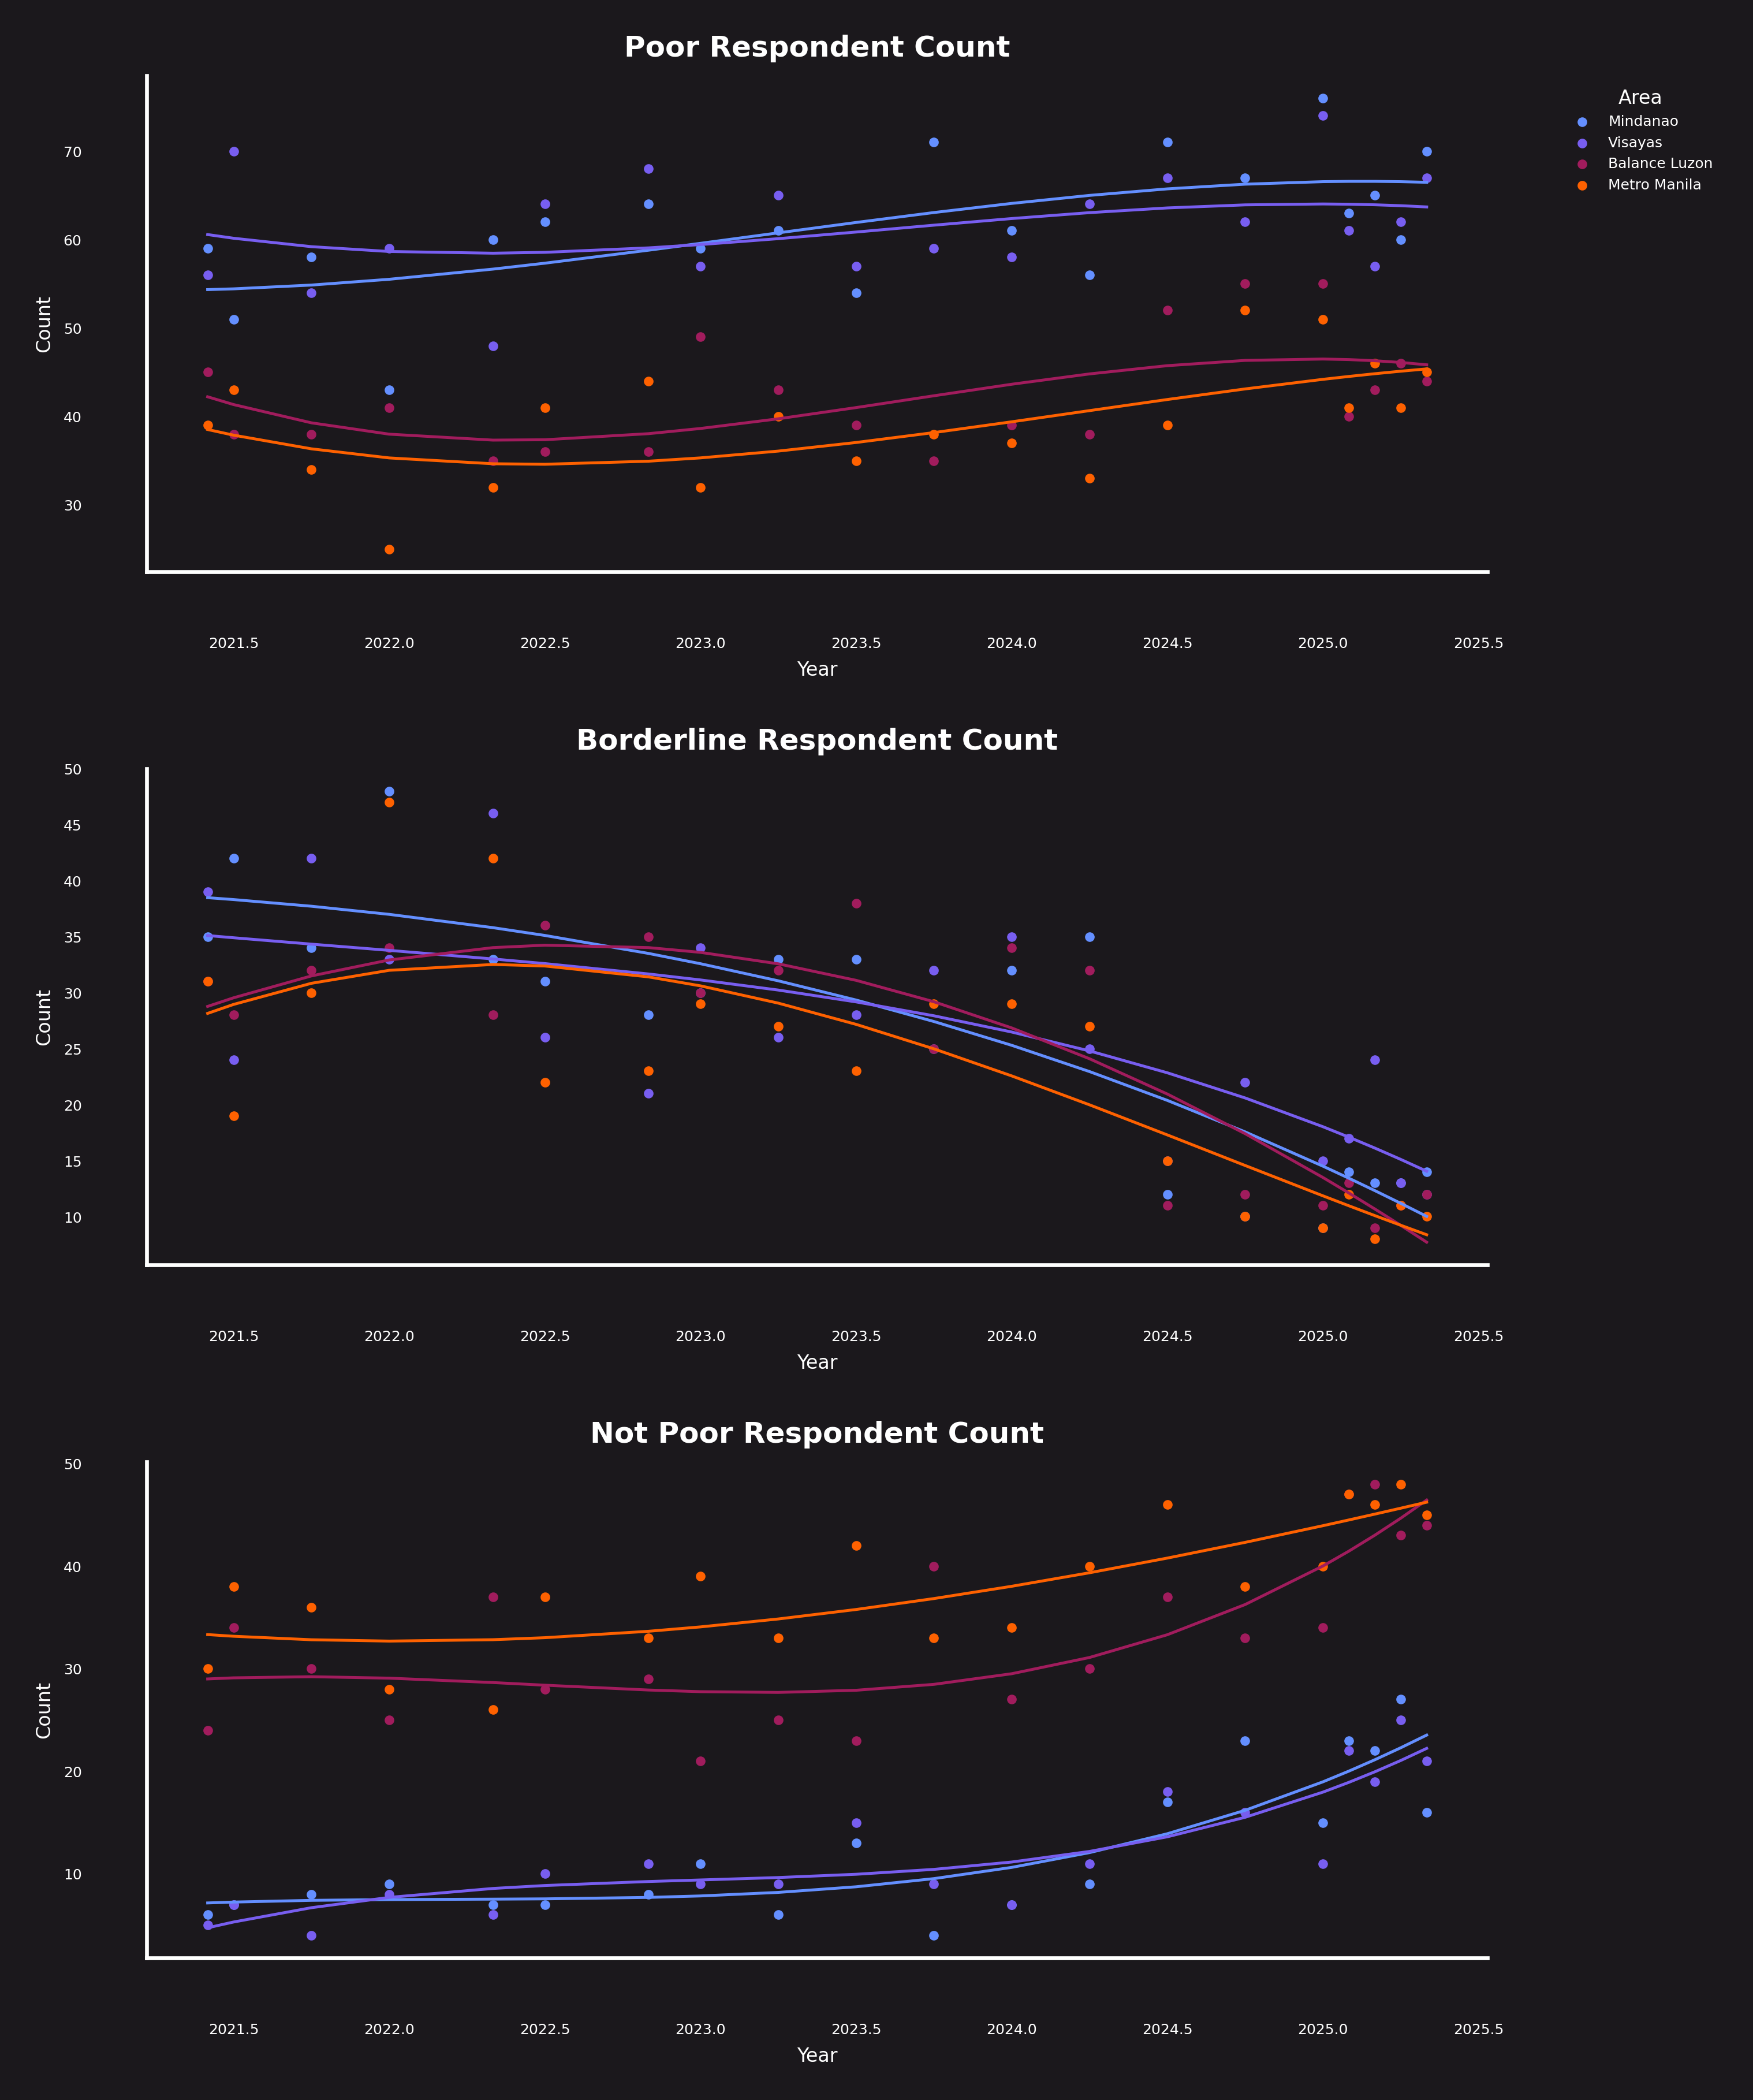

In [5]:
# Create subplots for "Poor", "Borderline", and "Not Poor"
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 6))  # Adjust figure size for subplots
degree = 3  # Degree of the polynomial regression



# Plot for "Poor"
ax = axes[0]
for i, area in enumerate(areas):
    area_subset = area_data[area_data['Area'] == area]
    x = area_subset['Year'].values.reshape(-1, 1)
    y = area_subset['Poor '].values

    # Scatter plot
    ax.scatter(x, y, label=area, s=4, color=colors[i % len(colors)])  # Use specified colors cyclically

    # Polynomial regression
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(x, y)
    y_pred = poly_model.predict(x)
    ax.plot(x, y_pred, linewidth=0.6, color=colors[i % len(colors)])  # Match regression line color to scatter points

ax.set_title('Poor Respondent Count', fontsize=6, pad=4)
ax.set_xlabel('Year', fontsize=4, labelpad=2)
ax.set_ylabel('Count', fontsize=4, labelpad=2)
ax.tick_params(axis='both', which='major', labelsize=3)
ax.legend(title='Area', fontsize=3, title_fontsize=4, loc='upper left', bbox_to_anchor=(1.05, 1))

# Plot for "Borderline"
ax = axes[1]
for i, area in enumerate(areas):
    area_subset = area_data[area_data['Area'] == area]
    x = area_subset['Year'].values.reshape(-1, 1)
    y = area_subset['Borderline'].values

    # Scatter plot
    ax.scatter(x, y, label=area, s=4, color=colors[i % len(colors)])  # Use specified colors cyclically

    # Polynomial regression
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(x, y)
    y_pred = poly_model.predict(x)
    ax.plot(x, y_pred, linewidth=0.6, color=colors[i % len(colors)])  # Match regression line color to scatter points

ax.set_title('Borderline Respondent Count', fontsize=6, pad=4)
ax.set_xlabel('Year', fontsize=4, labelpad=2)
ax.set_ylabel('Count', fontsize=4, labelpad=2)
ax.tick_params(axis='both', which='major', labelsize=3)

# Plot for "Not Poor"
ax = axes[2]
for i, area in enumerate(areas):
    area_subset = area_data[area_data['Area'] == area]
    x = area_subset['Year'].values.reshape(-1, 1)
    y = area_subset['Not Poor'].values

    # Scatter plot
    ax.scatter(x, y, label=area, s=4, color=colors[i % len(colors)])  # Use specified colors cyclically

    # Polynomial regression
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(x, y)
    y_pred = poly_model.predict(x)
    ax.plot(x, y_pred, linewidth=0.6, color=colors[i % len(colors)])  # Match regression line color to scatter points

ax.set_title('Not Poor Respondent Count', fontsize=6, pad=4)
ax.set_xlabel('Year', fontsize=4, labelpad=2)
ax.set_ylabel('Count', fontsize=4, labelpad=2)
ax.tick_params(axis='both', which='major', labelsize=3)

# Adjust layout for better fit
plt.tight_layout(pad=0.5, h_pad=1.0)

# Save the plot
plt.savefig('respondent_count_by_area_subplots.png', dpi=300)

# Show the plot
plt.show()
